# **Prelim Skills Exam** <br>

**Name**: Mj Spencer Almodiel <br>
**Instructor**: Engr. Roman Richard <br>
**Date Performed**: 3/12/24

1. Build and train a CNN model from a scratch.  Apply different regularization techniques and data preprocessing to reduce overfitting.

2.  Plot the training and validation loss and accuracy. The target accuracy is 85 and above.

3.  Use the assigned pre-trained model and fine-tuned it. 

4. Build and train a CNN model using the modified pretrained model.

5. Plot the training and validation loss and accuracy. The target accuracy is 95 and above.

6. Use the classification report, confusion matrix and ROC over AUC metric to evaluate also the performance of the scratch and using pre-trained mode

### Import the data and apply data preprocessing techniques

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import glob # to be used on search files
%matplotlib inline

In [2]:
xray_df = pd.read_csv(r"archive\Data_Entry_2017.csv")
xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


**Remove unnecessary columns**

In [3]:
xray_df = xray_df[['Image Index', 'Finding Labels', 'Follow-up #', 'Patient Age', 'Patient Gender']]

In [4]:
xray_df

,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender
0,00000001_000.png,Cardiomegaly,0,58,M
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,M
2,00000001_002.png,Cardiomegaly|Effusion,2,58,M
3,00000002_000.png,No Finding,0,81,M
4,00000003_000.png,Hernia,0,81,F
...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,39,M
112116,00030802_000.png,No Finding,0,29,M
112117,00030803_000.png,No Finding,0,42,F
112118,00030804_000.png,No Finding,0,30,F


- We can see that in Patient Age column, the max value in age is 414. Let's clean and only get age under 100.

In [5]:
xray_df = xray_df[xray_df['Patient Age'] < 100]
xray_df.describe()

,Follow-up #,Patient Age
count,112104.000000,112104.000000
mean,8.574172,46.872574
std,15.406734,16.598152
min,0.000000,1.000000
25%,0.000000,35.000000
50%,3.000000,49.000000
75%,10.000000,59.000000
max,183.000000,95.000000


In [6]:
xray_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     112104 non-null  object
 1   Finding Labels  112104 non-null  object
 2   Follow-up #     112104 non-null  int64 
 3   Patient Age     112104 non-null  int64 
 4   Patient Gender  112104 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.1+ MB


Change **"Patient Gender"** to binary values. 1 for male and 0 for female.

In [7]:
xray_df['Patient Gender'] = xray_df['Patient Age'].replace({'M': 1, 'F': 0})

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
image_paths = {os.path.basename(x): x for x in glob.glob(os.path.join('archive/images*/*/*.png'))} 
len(image_paths)

112120

In [9]:
xray_df['path'] = xray_df['Image Index'].map(image_paths.get)
xray_df.head(5)

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender,path
0,00000001_000.png,Cardiomegaly,0,58,58,archive\images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,58,archive\images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,58,58,archive\images_001\images\00000001_002.png
3,00000002_000.png,No Finding,0,81,81,archive\images_001\images\00000002_000.png
4,00000003_000.png,Hernia,0,81,81,archive\images_001\images\00000003_000.png


- First thing I noticed within the data is that there are some rows that have multiple labels. I should convert this to binary values to maintain its multiple label characteristic. 

In [10]:
from itertools import chain
labels = np.unique(list(chain(*xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))    # splits the findings by |

# lets remove the '' value
labels = [x for x in labels if x != 'No Finding']
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [11]:
xray_df['Finding Labels'].value_counts()[:20]



No Finding                           60353
Infiltration                          9546
Atelectasis                           4214
Effusion                              3955
Nodule                                2705
Pneumothorax                          2193
Mass                                  2139
Effusion|Infiltration                 1603
Atelectasis|Infiltration              1350
Consolidation                         1310
Atelectasis|Effusion                  1165
Pleural_Thickening                    1126
Cardiomegaly                          1093
Emphysema                              892
Infiltration|Nodule                    829
Atelectasis|Effusion|Infiltration      737
Fibrosis                               727
Edema                                  627
Cardiomegaly|Effusion                  484
Consolidation|Infiltration             441
Name: Finding Labels, dtype: int64

- As you can see, since have over 120k+ of data. There are some rows that have multiple findings.

- Let's try only use the labels that are greater than 1000 instances. Since there are some labels that have 3 findings but not enough compared to the size of whole dataset. We can change this later if the model's performance is good.

In [12]:
minCount = 1000

# Count the occurrences of each label
label_counts = {}
for label in labels:
    label_counts[label] = (xray_df['Finding Labels'].str.contains(label)).sum()

# Filter the labels that occur more than 1000 times
filtered_labels = [label for label, count in label_counts.items() if count > 1000]
filtered_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [13]:
for label, count in label_counts.items():
    if count > 1000:
        print(label, count)

Atelectasis 11558
Cardiomegaly 2776
Consolidation 4667
Edema 2302
Effusion 13316
Emphysema 2516
Fibrosis 1686
Infiltration 19891
Mass 5779
Nodule 6331
Pleural_Thickening 3384
Pneumonia 1430
Pneumothorax 5301


- Let's transform the labels to 0 and 1. So that it can be trainable. But since this problem is a multilabel classification, there are instances that 1 or more findings can be concluded. 

In [14]:
label_encoding = {label: idx for idx, label in enumerate(filtered_labels)}

def transform_label(label_string):
    labels = label_string.split('|')
    binary_array = np.zeros(len(filtered_labels), dtype=np.int)
    for label in labels:
        if label in label_encoding:
            idx = label_encoding[label]
            binary_array[idx] = 1
    return binary_array

In [15]:
# xray_df['Encoded Labels'] = xray_df['Finding Labels'].apply(transform_label)

In [16]:
xray_df['Finding Labels'].head(5)

0              Cardiomegaly
1    Cardiomegaly|Emphysema
2     Cardiomegaly|Effusion
3                No Finding
4                    Hernia
Name: Finding Labels, dtype: object

In [17]:
# xray_df['Encoded Labels']

In [18]:
for lb in labels:
    xray_df[lb] = xray_df['Finding Labels'].map(lambda x : 1.0 if lb in x else 0)

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,58,58,archive\images_001\images\00000001_000.png,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,58,archive\images_001\images\00000001_001.png,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,58,58,archive\images_001\images\00000001_002.png,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,81,81,archive\images_001\images\00000002_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,81,81,archive\images_001\images\00000003_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split into training and testing data <br>
- I will use stratify to deal with data imbalance 

In [20]:
from sklearn.model_selection import train_test_split

training_df, testing_df = train_test_split(xray_df, 
                                   test_size = 0.2, 
                                   stratify = xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', training_df.shape[0], 'validation', testing_df.shape[0])

train 89683 validation 22421


In [21]:
training_df.value_counts

<bound method DataFrame.value_counts of             Image Index Finding Labels  Follow-up #  Patient Age  \
98650  00026082_001.png     No Finding            1           52   
46331  00011845_004.png     No Finding            4           66   
58027  00014358_015.png       Effusion           15           43   
71952  00017726_000.png         Nodule            0           47   
46074  00011802_004.png     No Finding            4           30   
...                 ...            ...          ...          ...   
78410  00019241_002.png   Infiltration            2           41   
23737  00006271_068.png     No Finding           68           40   
21816  00005780_000.png     No Finding            0           34   
24509  00006446_010.png   Infiltration           10           67   
77126  00018949_010.png   Infiltration           10            7   

       Patient Gender                                        path  \
98650              52  archive\images_011\images\00026082_001.png   
46331

### Apply Data Generator in images

In [22]:
import tensorflow as tf

In [23]:
strategy = tf.distribute.MirroredStrategy()
print('DEVICES AVAILABLE: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
DEVICES AVAILABLE: 1


In [24]:
AUTOTUNE = tf.data.AUTOTUNE
IMAGE_SIZE = 128
BATCH_SIZE_PER_REPLICA = 32

BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

In [25]:
from keras.preprocessing.image import ImageDataGenerator

core_idg = ImageDataGenerator(horizontal_flip=True)

In [26]:
train_generator = core_idg.flow_from_dataframe(dataframe=training_df,
                                        directory=None,
                                        x_col = 'path',
                                        y_col = labels,
                                        class_mode = 'raw',
#                                         classes = all_labels,
                                        target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode = 'grayscale',
                                        batch_size = BATCH_SIZE,
                                        shuffle = True)
test_generator = core_idg.flow_from_dataframe(dataframe=testing_df,
                                        directory=None,
                                        x_col = 'path',
                                        y_col = labels,
                                        class_mode = 'raw',
#                                         classes = all_labels,
                                        target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode = 'grayscale',
                                        batch_size = 256)

Found 89683 validated image filenames.
Found 22421 validated image filenames.


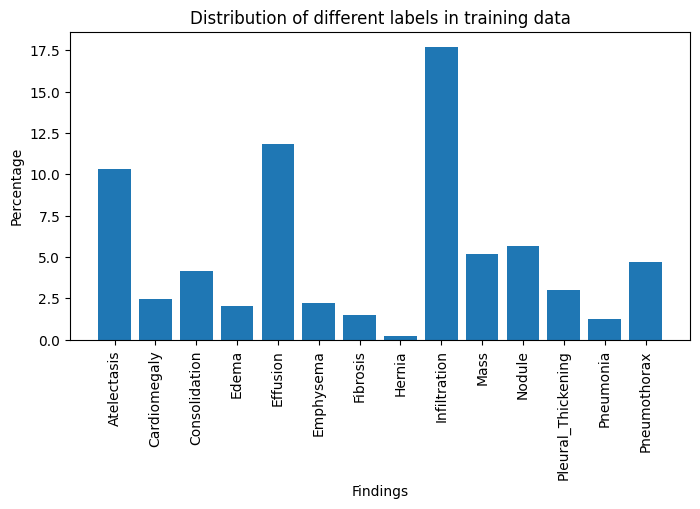

In [27]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
plt.bar(labels, train_generator.labels.sum(axis = 0)/train_generator.n * 100)
plt.title('Distribution of different labels in training data')
plt.xlabel('Findings')
plt.ylabel('Percentage')
plt.show()

### Convert dataframes to tensorflow dataset

In [28]:
train_data = tf.data.Dataset.from_generator(
                lambda: train_generator,
                output_types = (tf.float32, tf.float32), 
                output_shapes = ([None,IMAGE_SIZE,IMAGE_SIZE,1], [None,len(labels)]))


test_data = tf.data.Dataset.from_generator(
                lambda: test_generator,
                output_types=(tf.float32, tf.float32), 
                output_shapes=([None,IMAGE_SIZE,IMAGE_SIZE,1], [None,len(labels)]))

In [29]:
one_batch_samples = next(iter(train_data))
image_samples, __ = one_batch_samples

### Rescale image so that the model can handle all inputs consistently

In [30]:
rescaled_layer = tf.keras.layers.Rescaling(1. / 255)

In [31]:
scale_train_data = train_data.map(lambda x,y: (rescaled_layer(x),y),num_parallel_calls = AUTOTUNE)
scale_test_data = test_data.map(lambda x,y: (rescaled_layer(x),y),num_parallel_calls = AUTOTUNE)

### Remove background <br>
- Removing background will reduce the noise within the data.

In [32]:
def background_rm(image):   # this function gets all pixel values that are greater than 0.
    img_list = []
    for i in range(image.shape[0]):
        try:
            img = image[i]

            sumOfCols = np.sum(img, axis=0)
            sumOfRows = np.sum(img, axis=1)

            for i in range(len(sumOfCols)):
                if sumOfCols[i] > 0:
                    x1 = i
                    break

            for i in range(len(sumOfCols)-1,-1,-1):
                if sumOfCols[i] > 0:
                    x2 = i
                    break

            for i in range(len(sumOfRows)):
                if sumOfRows[i] > 0:
                    y1 = i
                    break

            for i in range(len(sumOfRows)-1,-1,-1):
                if sumOfRows[i] > 0:
                    y2 = i
                    break

            roi = img[y1:y2,x1:x2]
            roi = tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE) (roi)
            img_list.append(roi)
        except:
            img_list.append(img)

    return tf.convert_to_tensor(tf.stack(img_list))

In [33]:
"""
Using the Python function background_rm, this program does background removal
to input photos and incorporates it into a TensorFlow network for image preparation
inside a TensorFlow pipeline. The output is then returned, together with the original
label and processed image.
"""
def background_rm_tf(image,label):
    im_shape = image.shape
    [image,] = tf.py_function(background_rm, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

In [34]:
rm_background_train_data = scale_train_data.map(background_rm_tf,num_parallel_calls = AUTOTUNE)
rm_background_test_data = scale_test_data.map(background_rm_tf,num_parallel_calls = AUTOTUNE)

### Remove noise 

In [35]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma
from skimage import img_as_float

In [36]:
# We will be removing erroneous values within the images.
def denoise(image):
    return denoise_tv_chambolle(img_as_float(image), weight=0.01)

def denoise_tf(image,label):
    im_shape = image.shape
    [image,] = tf.py_function(denoise, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

In [37]:
rm_noise_train_data = rm_background_train_data.map(denoise_tf,num_parallel_calls = AUTOTUNE)
rm_noise_test_data = rm_background_test_data.map(denoise_tf,num_parallel_calls = AUTOTUNE)

### Build a CNN model from scratch.

In [38]:
train_data = rm_noise_train_data.map(lambda x,y: (tf.image.grayscale_to_rgb(x),y)).cache().prefetch(buffer_size = AUTOTUNE)
valid_data = rm_noise_test_data.map(lambda x,y: (tf.image.grayscale_to_rgb(x),y)).cache().prefetch(buffer_size = AUTOTUNE)

In [39]:
test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=testing_df,
                                        directory=None,
                                        x_col = 'path',
                                        y_col = labels,
                                        class_mode = 'raw',
                                        target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        color_mode = 'grayscale',
                                        batch_size = 1024))

Found 22421 validated image filenames.


In [40]:
test_X_normal = tf.keras.layers.Rescaling(1./255) (test_X)
test_X_normal = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_X_normal))

In [41]:
test_X_process = test_X.copy()

test_X_process = background_rm(test_X_process)
test_X_process = tf.keras.layers.Rescaling(1./255) (test_X_process)
test_X_process = denoise(test_X_process)

test_X_process = tf.image.grayscale_to_rgb(tf.convert_to_tensor(test_X_process))

In [42]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten,BatchNormalization,Input,Conv2D,MaxPooling2D,concatenate,Conv2DTranspose

In [50]:
from keras.models import Sequential
# Define the input shape
input_shape = (128, 128, 3)  # Assuming RGB images of size 512x512

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(14, activation='sigmoid'))  # 14 output neurons with sigmoid activation for multilabel classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for multilabel classification
              metrics=['binary_accuracy', tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)     

# Train the model
model.compile(optimizer = tf.keras.optimizers.Adam(0.0005), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', tf.keras.metrics.AUC()])

In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor, e.g., validation loss
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores the model weights from the epoch with the best value of the monitored metric
)

In [49]:
model_hist = model.fit(train_data, 
            steps_per_epoch = 2500,
            # validation_data = valid_data, 
            # validation_steps = len(test_generator),
            epochs = 50,
            verbose = 1,
            callbacks= [early_stopping]
            )

Epoch 1/10


100/100 [==============================] - 38s 337ms/step - loss: 0.2107 - accuracy: 0.1256 - auc_2: 0.6908
Epoch 2/10
100/100 [==============================] - 35s 350ms/step - loss: 0.1828 - accuracy: 0.1022 - auc_2: 0.7251
Epoch 3/10
100/100 [==============================] - 35s 353ms/step - loss: 0.1868 - accuracy: 0.1409 - auc_2: 0.7373
Epoch 4/10
100/100 [==============================] - 38s 376ms/step - loss: 0.1861 - accuracy: 0.0972 - auc_2: 0.7293
Epoch 5/10
100/100 [==============================] - 37s 366ms/step - loss: 0.1821 - accuracy: 0.1722 - auc_2: 0.7322
Epoch 6/10
  9/100 [=>............................] - ETA: 32s - loss: 0.1820 - accuracy: 0.1354 - auc_2: 0.7649

KeyboardInterrupt: 

### Pre-trained model

#### Dense121

In [ ]:
input = tf.keras.layers.Input([IMAGE_SIZE, IMAGE_SIZE, 3], dtype = tf.float32)

dense121 = tf.keras.applications.DenseNet121(include_top=False,weights="imagenet",pooling='avg')
dense121 = dense121(input,)

output = Dense(len(labels), activation = 'sigmoid') (dense121)

dense121_model = tf.keras.Model(inputs=[input], outputs=[output])
dense121_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense (Dense)               (None, 14)                14350     
                                                                 
Total params: 7,051,854
Trainable params: 6,968,206
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
steps_per_epoch = training_df.shape[0]  // BATCH_SIZE
steps_per_epoch

2802

In [ ]:
dense121_model.compile(optimizer = tf.keras.optimizers.Adam(0.0005), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', tf.keras.metrics.AUC()])

In [ ]:
dense_hist = dense121_model.fit(train_data, 
            steps_per_epoch = 512,
            # validation_data = valid_data, 
            validation_steps = len(test_generator),
            epochs = 5,
            verbose = 1
            )

Epoch 1/5


512/512 [==============================] - 217s 423ms/step - loss: 0.1626 - binary_accuracy: 0.9429 - auc: 0.7969
Epoch 2/5
512/512 [==============================] - 207s 404ms/step - loss: 0.1621 - binary_accuracy: 0.9434 - auc: 0.7998
Epoch 3/5
512/512 [==============================] - 215s 421ms/step - loss: 0.1598 - binary_accuracy: 0.9410 - auc: 0.8075
Epoch 4/5
512/512 [==============================] - 211s 413ms/step - loss: 0.1625 - binary_accuracy: 0.9431 - auc: 0.8014
Epoch 5/5
512/512 [==============================] - 210s 411ms/step - loss: 0.1580 - binary_accuracy: 0.9419 - auc: 0.8064


Let's see the performance using pre-trained model

In [ ]:
y_pred_dense121_normal = dense121_model.predict(test_X_normal)
y_pred_dense121_normal[:5]

32/32 [==============================] - 1s 30ms/step


array([[2.22117618e-01, 1.69901159e-02, 2.73906905e-02, 8.14035349e-03,
        2.17708703e-02, 3.35199921e-03, 7.49617815e-03, 2.52192025e-03,
        5.48780560e-01, 1.18755065e-02, 9.56992581e-02, 5.71691105e-03,
        2.04339027e-02, 7.71412579e-03],
       [8.14556420e-01, 1.54316251e-03, 4.42830473e-03, 2.90127413e-04,
        5.95227908e-03, 9.31007380e-04, 3.62812518e-03, 4.08302154e-03,
        4.98008430e-02, 6.00173604e-03, 1.04472078e-01, 9.66539606e-04,
        3.05961980e-03, 2.86812457e-04],
       [2.56619126e-01, 5.75563824e-03, 3.79536636e-02, 8.44829902e-03,
        6.78597987e-02, 2.51766723e-02, 1.93608422e-02, 4.13875375e-03,
        2.03687385e-01, 9.57568809e-02, 1.86010167e-01, 2.46808492e-02,
        1.54269654e-02, 4.91249375e-02],
       [6.47517443e-01, 5.75911999e-03, 1.54593568e-02, 1.44993665e-03,
        1.76123008e-02, 4.07124357e-03, 1.08336229e-02, 6.36150734e-03,
        1.35636270e-01, 1.12703638e-02, 1.30135044e-01, 2.70875660e-03,
        7.266

0.6735576549088221


Text(0, 0.5, 'True Positive Rate')

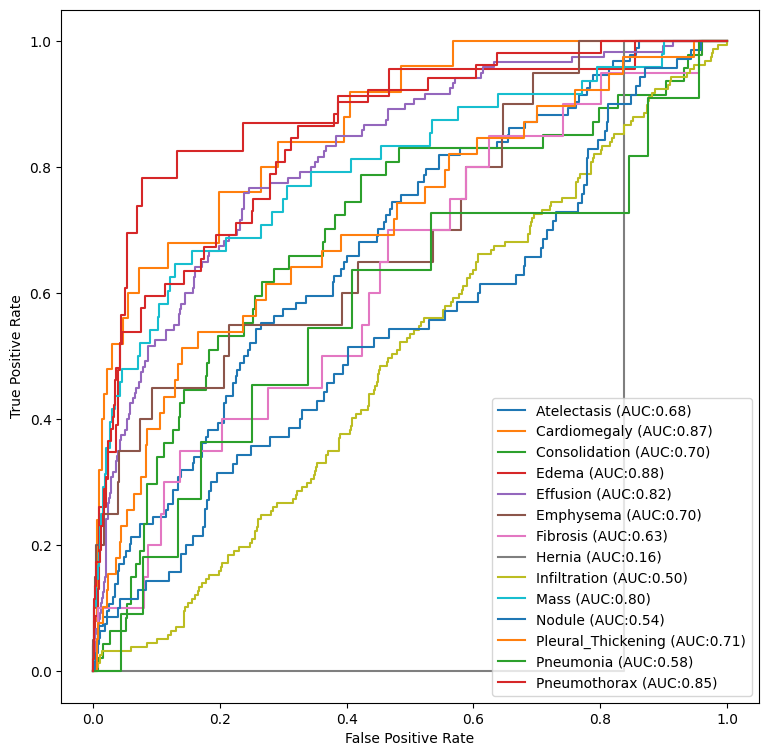

In [ ]:
from sklearn.metrics import roc_curve, auc,f1_score
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
mean_auc_dense121_normal = 0
for (idx, c_label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), y_pred_dense121_normal[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    mean_auc_dense121_normal += auc(fpr, tpr)

mean_auc_dense121_normal /= 14
print(mean_auc_dense121_normal)
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')